In [91]:
#importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# import the split function from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn import *
from sklearn.linear_model import *

from tqdm import tqdm
import math
import random
import missingno as msno 

from scipy import stats
from scipy.stats import norm, skew

In [92]:
#Loading data from csv
train_df = pd.read_csv('Train.csv')
train_df.columns = [col.replace(' ','_') for col in train_df.columns]
train_df.columns = [col.replace('(','') for col in train_df.columns]
train_df.columns = [col.replace(')','') for col in train_df.columns]
train_df.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_Mo_=_1,Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_Mo_=_1,...,Arrival_at_Destination_-_Time,Distance_KM,Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [93]:
test_df = pd.read_csv('Test.csv')
test_df.columns = [col.replace(' ','_') for col in test_df.columns]
test_df.columns = [col.replace('(','') for col in test_df.columns]
test_df.columns = [col.replace(')','') for col in test_df.columns]
test_df.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_Mo_=_1,Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_Mo_=_1,...,Pickup_-_Weekday_Mo_=_1,Pickup_-_Time,Distance_KM,Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [94]:
riders_df = pd.read_csv('Riders.csv')
riders_df.columns = [col.replace(' ','_') for col in riders_df.columns]
riders_df.head()

,Rider_Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [95]:
train = pd.merge(train_df, riders_df, on = 'Rider_Id')

In [96]:
test = pd.merge(test_df, riders_df, on = 'Rider_Id')

In [97]:
train.columns

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement_-_Day_of_Month',
       'Placement_-_Weekday_Mo_=_1', 'Placement_-_Time',
       'Confirmation_-_Day_of_Month', 'Confirmation_-_Weekday_Mo_=_1',
       'Confirmation_-_Time', 'Arrival_at_Pickup_-_Day_of_Month',
       'Arrival_at_Pickup_-_Weekday_Mo_=_1', 'Arrival_at_Pickup_-_Time',
       'Pickup_-_Day_of_Month', 'Pickup_-_Weekday_Mo_=_1', 'Pickup_-_Time',
       'Arrival_at_Destination_-_Day_of_Month',
       'Arrival_at_Destination_-_Weekday_Mo_=_1',
       'Arrival_at_Destination_-_Time', 'Distance_KM', 'Temperature',
       'Precipitation_in_millimeters', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'Rider_Id',
       'Time_from_Pickup_to_Arrival', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings'],
      dtype='object')

In [98]:
test.columns

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement_-_Day_of_Month',
       'Placement_-_Weekday_Mo_=_1', 'Placement_-_Time',
       'Confirmation_-_Day_of_Month', 'Confirmation_-_Weekday_Mo_=_1',
       'Confirmation_-_Time', 'Arrival_at_Pickup_-_Day_of_Month',
       'Arrival_at_Pickup_-_Weekday_Mo_=_1', 'Arrival_at_Pickup_-_Time',
       'Pickup_-_Day_of_Month', 'Pickup_-_Weekday_Mo_=_1', 'Pickup_-_Time',
       'Distance_KM', 'Temperature', 'Precipitation_in_millimeters',
       'Pickup_Lat', 'Pickup_Long', 'Destination_Lat', 'Destination_Long',
       'Rider_Id', 'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings'],
      dtype='object')

In [99]:
train = train[['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement_-_Day_of_Month',
       'Placement_-_Weekday_Mo_=_1', 'Placement_-_Time',
       'Confirmation_-_Day_of_Month', 'Confirmation_-_Weekday_Mo_=_1',
       'Confirmation_-_Time', 'Arrival_at_Pickup_-_Day_of_Month',
       'Arrival_at_Pickup_-_Weekday_Mo_=_1', 'Arrival_at_Pickup_-_Time',
       'Pickup_-_Day_of_Month', 'Pickup_-_Weekday_Mo_=_1', 'Pickup_-_Time',
       'Distance_KM', 'Temperature', 'Precipitation_in_millimeters',
       'Pickup_Lat', 'Pickup_Long', 'Destination_Lat', 'Destination_Long',
       'Rider_Id', 'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings',
       'Time_from_Pickup_to_Arrival'
    
]]

In [100]:
df = pd.concat([train, test], sort = False)

In [101]:
df.isna().sum()

Order_No                                  0
User_Id                                   0
Vehicle_Type                              0
Platform_Type                             0
Personal_or_Business                      0
Placement_-_Day_of_Month                  0
Placement_-_Weekday_Mo_=_1                0
Placement_-_Time                          0
Confirmation_-_Day_of_Month               0
Confirmation_-_Weekday_Mo_=_1             0
Confirmation_-_Time                       0
Arrival_at_Pickup_-_Day_of_Month          0
Arrival_at_Pickup_-_Weekday_Mo_=_1        0
Arrival_at_Pickup_-_Time                  0
Pickup_-_Day_of_Month                     0
Pickup_-_Weekday_Mo_=_1                   0
Pickup_-_Time                             0
Distance_KM                               0
Temperature                            5803
Precipitation_in_millimeters          27518
Pickup_Lat                                0
Pickup_Long                               0
Destination_Lat                 

In [102]:
def drop_columns(input_df, threshold, unique_threshold):
    for column in input_df.columns:
        if ((input_df[column].isna().mean() * 100) > threshold):
            input_df.drop(column, axis = 1, inplace = True)
            print(f'The {column} dropped')
        elif (input_df[column].nunique() < unique_threshold):
            input_df.drop(column, axis = 1, inplace = True)
            print(f'The {column} dropped')

In [103]:
drop_columns(df, 80, 2)

The Vehicle_Type dropped
The Precipitation_in_millimeters dropped


In [104]:
df.head()

,Order_No,User_Id,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_Mo_=_1,Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_Mo_=_1,Confirmation_-_Time,...,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time_from_Pickup_to_Arrival
0,Order_No_4211,User_Id_633,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,1637,1309,13.8,549,745.0
1,Order_No_27440,User_Id_2642,3,Personal,18,5,3:41:17 PM,18,5,3:41:30 PM,...,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,1637,1309,13.8,549,2886.0
2,Order_No_14170,User_Id_3339,3,Business,31,5,12:51:41 PM,31,5,1:12:49 PM,...,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,1637,1309,13.8,549,2615.0
3,Order_No_21727,User_Id_3523,3,Personal,2,2,7:12:10 AM,2,2,7:12:29 AM,...,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,1637,1309,13.8,549,2986.0
4,Order_No_8301,User_Id_87,2,Personal,22,2,10:40:58 AM,22,2,10:42:24 AM,...,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1637,1309,13.8,549,1602.0


In [105]:
df.isna().sum()

Order_No                                 0
User_Id                                  0
Platform_Type                            0
Personal_or_Business                     0
Placement_-_Day_of_Month                 0
Placement_-_Weekday_Mo_=_1               0
Placement_-_Time                         0
Confirmation_-_Day_of_Month              0
Confirmation_-_Weekday_Mo_=_1            0
Confirmation_-_Time                      0
Arrival_at_Pickup_-_Day_of_Month         0
Arrival_at_Pickup_-_Weekday_Mo_=_1       0
Arrival_at_Pickup_-_Time                 0
Pickup_-_Day_of_Month                    0
Pickup_-_Weekday_Mo_=_1                  0
Pickup_-_Time                            0
Distance_KM                              0
Temperature                           5803
Pickup_Lat                               0
Pickup_Long                              0
Destination_Lat                          0
Destination_Long                         0
Rider_Id                                 0
No_Of_Order

In [106]:
df = df.fillna(df.mean())

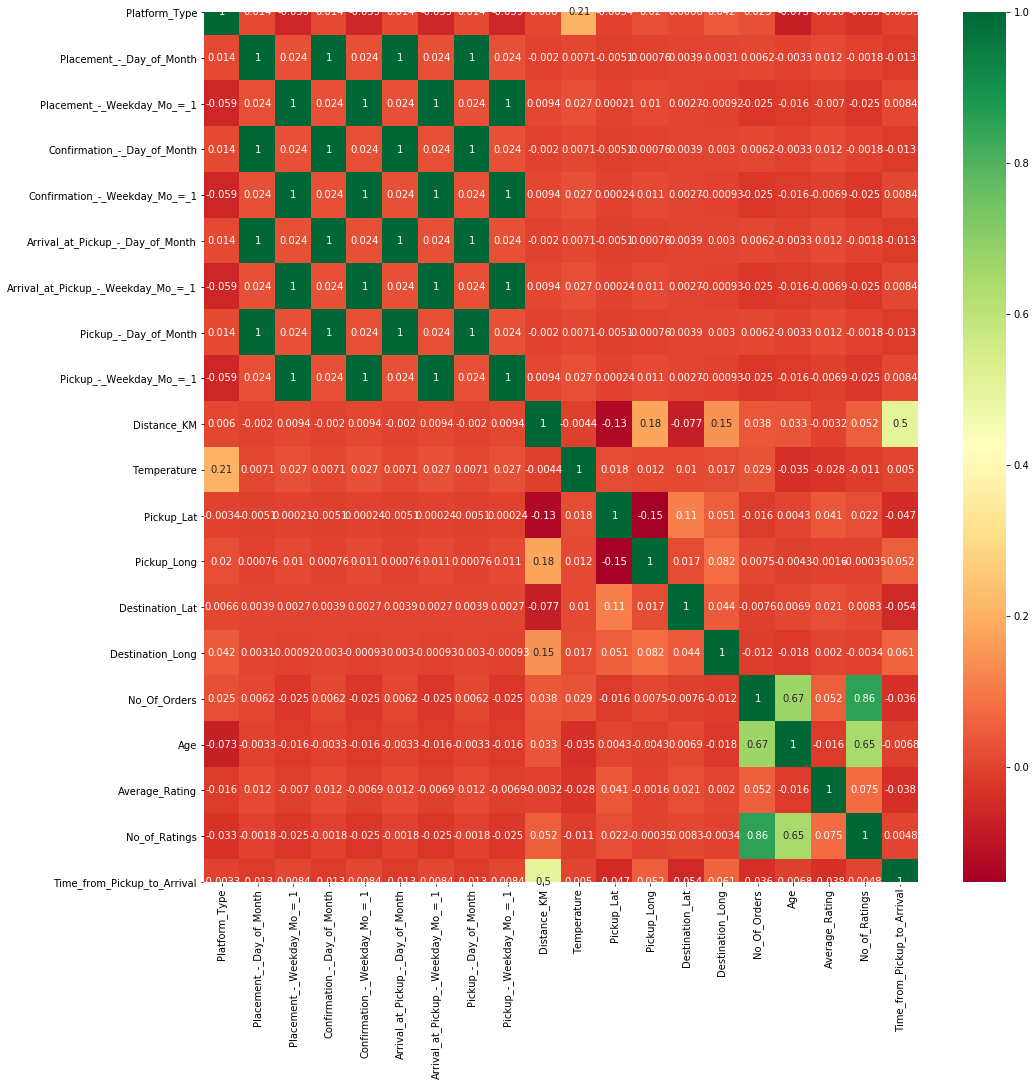

In [107]:
plt.figure(figsize=(16,16))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='RdYlGn')
plt.show()

In [108]:
#remove highly correlated features
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [109]:
df.drop(df[to_drop], axis=1)

,Order_No,User_Id,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_Mo_=_1,Placement_-_Time,Confirmation_-_Time,Arrival_at_Pickup_-_Time,Pickup_-_Time,...,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time_from_Pickup_to_Arrival
0,Order_No_4211,User_Id_633,3,Business,9,5,9:35:46 AM,9:40:10 AM,10:04:47 AM,10:27:30 AM,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,1637,1309,13.8,549,745.000000
1,Order_No_27440,User_Id_2642,3,Personal,18,5,3:41:17 PM,3:41:30 PM,4:07:16 PM,4:13:37 PM,...,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,1637,1309,13.8,549,2886.000000
2,Order_No_14170,User_Id_3339,3,Business,31,5,12:51:41 PM,1:12:49 PM,1:20:02 PM,1:33:08 PM,...,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,1637,1309,13.8,549,2615.000000
3,Order_No_21727,User_Id_3523,3,Personal,2,2,7:12:10 AM,7:12:29 AM,7:35:24 AM,7:38:46 AM,...,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,1637,1309,13.8,549,2986.000000
4,Order_No_8301,User_Id_87,2,Personal,22,2,10:40:58 AM,10:42:24 AM,10:56:00 AM,10:59:40 AM,...,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1637,1309,13.8,549,1602.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7063,Order_No_5207,User_Id_635,3,Business,8,5,12:56:22 PM,1:43:10 PM,2:01:04 PM,2:46:12 PM,...,-1.300921,36.828195,-1.272807,36.796236,Rider_Id_738,2849,2506,14.2,427,1556.920947
7064,Order_No_11108,User_Id_2154,3,Business,9,3,3:08:38 PM,3:17:47 PM,3:23:45 PM,3:38:22 PM,...,-1.316959,36.700003,-1.276574,36.851365,Rider_Id_443,3504,2234,14.6,1086,1556.920947
7065,Order_No_15696,User_Id_1899,3,Business,31,5,1:25:34 PM,1:32:50 PM,1:36:35 PM,1:42:45 PM,...,-1.303596,36.778378,-1.330611,36.848052,Rider_Id_176,417,136,12.8,34,1556.920947
7066,Order_No_14332,User_Id_1245,3,Business,11,1,8:55:12 AM,8:55:46 AM,9:03:12 AM,9:38:19 AM,...,-1.300921,36.828195,-1.319862,36.711032,Rider_Id_181,34,291,15.0,5,1556.920947


In [110]:
df_final = df.drop(['Order_No', 'User_Id', 'Rider_Id'], axis = 1)

In [111]:
df_final.head()

,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_Mo_=_1,Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_Mo_=_1,Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_Mo_=_1,...,Temperature,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time_from_Pickup_to_Arrival
0,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,...,20.4,-1.317755,36.830370,-1.300406,36.829741,1637,1309,13.8,549,745.0
1,3,Personal,18,5,3:41:17 PM,18,5,3:41:30 PM,18,5,...,24.5,-1.326774,36.787807,-1.356237,36.904295,1637,1309,13.8,549,2886.0
2,3,Business,31,5,12:51:41 PM,31,5,1:12:49 PM,31,5,...,24.7,-1.255189,36.782203,-1.273412,36.818206,1637,1309,13.8,549,2615.0
3,3,Personal,2,2,7:12:10 AM,2,2,7:12:29 AM,2,2,...,15.2,-1.290315,36.757377,-1.223520,36.802061,1637,1309,13.8,549,2986.0
4,2,Personal,22,2,10:40:58 AM,22,2,10:42:24 AM,22,2,...,19.2,-1.273524,36.799220,-1.300431,36.752427,1637,1309,13.8,549,1602.0


In [112]:
df_final[['Placement_-_Time','Confirmation_-_Time','Arrival_at_Pickup_-_Time','Pickup_-_Time',
       ]] = df_final[['Placement_-_Time','Confirmation_-_Time','Arrival_at_Pickup_-_Time','Pickup_-_Time'
       ]].apply(pd.to_datetime)

In [113]:
#df_final['pickup_from_placement'] = (df_final['Pickup_-_Time']-df_final['Placement_-_Time']).astype('timedelta64[s]')
df_final['confirm_from_placement'] = (df_final['Confirmation_-_Time']-df_final['Placement_-_Time']).astype('timedelta64[s]')
df_final['arr_pickup_from_placement'] = (df_final['Arrival_at_Pickup_-_Time']-df_final['Placement_-_Time']).astype('timedelta64[s]')
df_final['pickup_from_arr_pickup'] = (df_final['Pickup_-_Time']-df_final['Arrival_at_Pickup_-_Time']).astype('timedelta64[s]')

In [114]:
df_final = df_final.drop(['Placement_-_Time','Confirmation_-_Time','Arrival_at_Pickup_-_Time','Pickup_-_Time'], axis = 1)

In [115]:
df_final.dtypes

Platform_Type                           int64
Personal_or_Business                   object
Placement_-_Day_of_Month                int64
Placement_-_Weekday_Mo_=_1              int64
Confirmation_-_Day_of_Month             int64
Confirmation_-_Weekday_Mo_=_1           int64
Arrival_at_Pickup_-_Day_of_Month        int64
Arrival_at_Pickup_-_Weekday_Mo_=_1      int64
Pickup_-_Day_of_Month                   int64
Pickup_-_Weekday_Mo_=_1                 int64
Distance_KM                             int64
Temperature                           float64
Pickup_Lat                            float64
Pickup_Long                           float64
Destination_Lat                       float64
Destination_Long                      float64
No_Of_Orders                            int64
Age                                     int64
Average_Rating                        float64
No_of_Ratings                           int64
Time_from_Pickup_to_Arrival           float64
confirm_from_placement            

In [116]:
df_final = pd.get_dummies(df_final, drop_first=True)
column_titles = [col for col in df_final.columns if col!= 'Time_from_Pickup_to_Arrival'] + ['Time_from_Pickup_to_Arrival']
df_final=df_final.reindex(columns=column_titles)

In [117]:
df_final.head()

,Platform_Type,Placement_-_Day_of_Month,Placement_-_Weekday_Mo_=_1,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_Mo_=_1,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_Mo_=_1,Pickup_-_Day_of_Month,Pickup_-_Weekday_Mo_=_1,Distance_KM,...,Destination_Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,confirm_from_placement,arr_pickup_from_placement,pickup_from_arr_pickup,Personal_or_Business_Personal,Time_from_Pickup_to_Arrival
0,3,9,5,9,5,9,5,9,5,4,...,36.829741,1637,1309,13.8,549,264.0,1741.0,1363.0,0,745.0
1,3,18,5,18,5,18,5,18,5,20,...,36.904295,1637,1309,13.8,549,13.0,1559.0,381.0,1,2886.0
2,3,31,5,31,5,31,5,31,5,6,...,36.818206,1637,1309,13.8,549,1268.0,1701.0,786.0,0,2615.0
3,3,2,2,2,2,2,2,2,2,18,...,36.802061,1637,1309,13.8,549,19.0,1394.0,202.0,1,2986.0
4,2,22,2,22,2,22,2,22,2,7,...,36.752427,1637,1309,13.8,549,86.0,902.0,220.0,1,1602.0


In [118]:
# Calculate correlations between predictor variables and the response variable
corrs = df_final.corr()['Time_from_Pickup_to_Arrival'].sort_values(ascending=False)

In [29]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'Time_from_Pickup_to_Arrival']
for col in column_titles:
    p_val = round(pearsonr(df_final[col], df_final['Time_from_Pickup_to_Arrival'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
Distance_KM,0.504879,0.000000
Pickup_Lat,-0.046787,0.000000
Average_Rating,-0.037551,0.000000
No_Of_Orders,-0.035719,0.000000
Destination_Lat,-0.053808,0.000000
pickup_from_arr_pickup,-0.069324,0.000000
Pickup_Long,0.052037,0.000000
pickup_from_placement,0.058880,0.000000
Destination_Long,0.061402,0.000000
arr_pickup_from_placement,0.108681,0.000000


In [30]:
df_final = df_final[['Distance_KM','Pickup_Lat','Average_Rating','No_Of_Orders','Destination_Lat','pickup_from_arr_pickup','arr_pickup_from_placement','Destination_Long','Pickup_Long','confirm_from_placement','Placement_-_Day_of_Month','Pickup_-_Day_of_Month','Confirmation_-_Day_of_Month','Arrival_at_Pickup_-_Day_of_Month','Time_from_Pickup_to_Arrival']]

KeyError: "['Pickup_-_Day_of_Month', 'Confirmation_-_Day_of_Month', 'Arrival_at_Pickup_-_Day_of_Month'] not in index"

In [76]:
y = df_final[:len(train)][['Time_from_Pickup_to_Arrival']]
X_train = df_final[:len(train)].drop('Time_from_Pickup_to_Arrival', axis = 1)
X_test = df_final[len(train):].drop('Time_from_Pickup_to_Arrival', axis = 1)       
X = df_final[:len(train)].drop('Time_from_Pickup_to_Arrival', axis = 1)

In [77]:
RF = RandomForestRegressor(n_estimators=100, max_depth=5)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [79]:
RF.fit(X_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [80]:
y_pred = RF.predict(X_test)

In [81]:
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [82]:
rmse(y_test, y_pred)

769.8304523787406

In [83]:
r2_score(y_test, y_pred)

0.38074171091991693

## Submission

In [84]:
X_train = df_final[:len(train)].drop('Time_from_Pickup_to_Arrival', axis = 1)
X_test = df_final[len(train):].drop('Time_from_Pickup_to_Arrival', axis = 1)

In [85]:
RF.fit(X_train, y.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [86]:
y_pred = RF.predict(X_test)

In [87]:
y_pred

array([1506.05560959, 2620.99291189, 1747.53531884, ..., 1588.42210328,
       1976.81063906, 1000.436255  ])

In [88]:
daf = pd.DataFrame(y_pred, columns =['Time from Pickup to Arrival'])

In [44]:
daf.head()

,Time from Pickup to Arrival
0,1511.195198
1,2587.856024
2,1748.528594
3,2269.469690
4,2312.079906


In [89]:
output = pd.DataFrame({"Order No":test['Order_No']})
submission = output.join(daf)
submission.to_csv("Sub_.csv", index = False)